In [3]:
import pandas as pd


df = pd.read_csv('train.csv', usecols=['Survived', 'Age', 'Fare'])


In [4]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [12]:
df.isnull().sum()


Survived    0
Age         0
Fare        0
dtype: int64

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\Dark_Coder\AppData\Local\Temp\ipykernel_2272\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [16]:
X_ = df.iloc[:,1:]
y_ = df.iloc[:,0]

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state=42)


C:\Users\Dark_Coder\AppData\Local\Temp\ipykernel_2272\1894932911.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


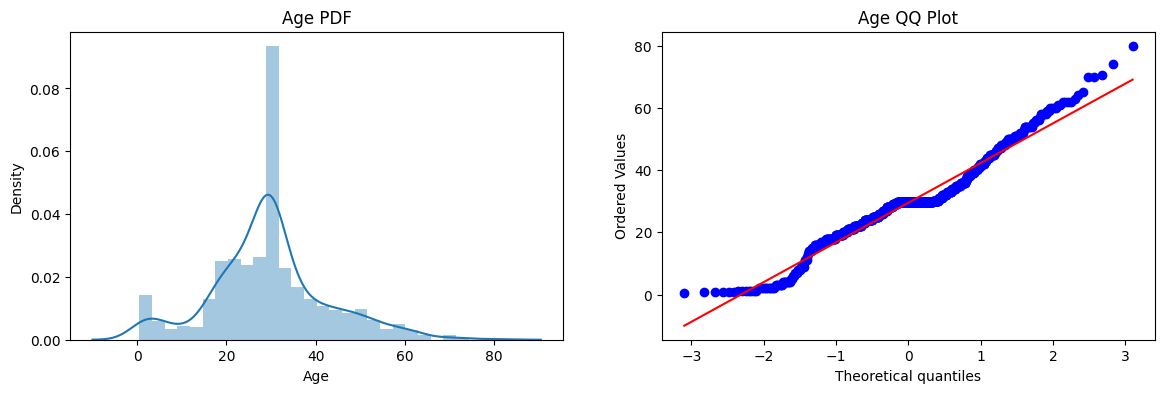

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

C:\Users\Dark_Coder\AppData\Local\Temp\ipykernel_2272\2981780686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


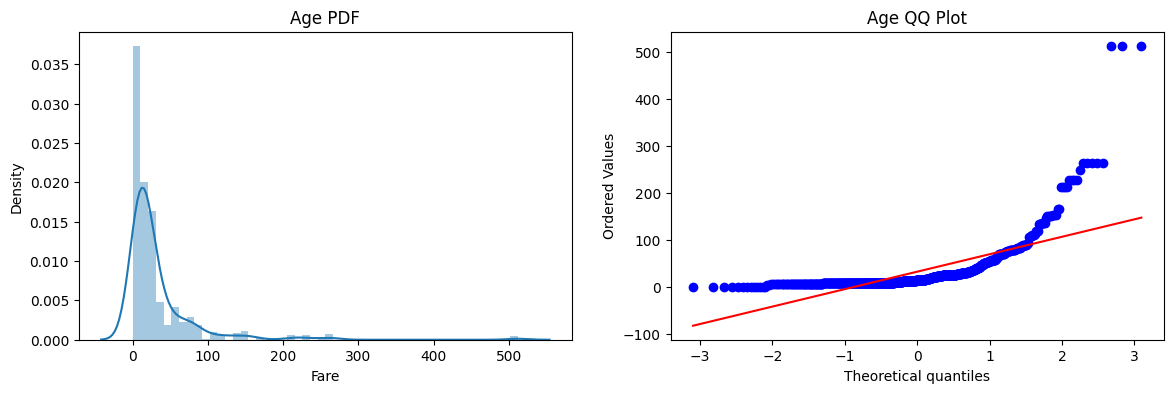

In [31]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [33]:
log_model = LogisticRegression()
Dec_model = DecisionTreeClassifier()

In [34]:
log_model.fit(X_train, y_train)
Dec_model.fit(X_test, y_test)

DecisionTreeClassifier()

In [35]:
log_per = log_model.predict(X_test)
Dec_per = Dec_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

print('Logistic Regression Accuracy:', accuracy_score(y_test, log_per))
print('Decision Tree Accuracy:', accuracy_score(y_test, Dec_per))

Logistic Regression Accuracy: 0.6480446927374302
Decision Tree Accuracy: 0.9832402234636871


In [41]:
from sklearn.model_selection import cross_val_score
import numpy as np

print('Logistic Regression Cross Validation Score:', np.mean(cross_val_score(log_model, X_, y_, cv=5)))
print('Decision Tree Cross Validation Score:', np.mean(cross_val_score(Dec_model, X_, y_, cv=5)))

Logistic Regression Cross Validation Score: 0.6588726382524637
Decision Tree Cross Validation Score: 0.644234511330111


FunctionTransformer documentation >>>

https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.FunctionTransformer.html   

In [37]:
from sklearn.pipeline import FunctionTransformer
import numpy as np

flt_transformer = FunctionTransformer(func=np.log1p)

X_train_transformed = flt_transformer.fit_transform(X_train)
X_test_transformed = flt_transformer.transform(X_test)

In [49]:
log_model_1 =  LogisticRegression()
Dec_model_1 = DecisionTreeClassifier()

In [50]:
log_model_1.fit(X_train_transformed, y_train)
Dec_model_1.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [51]:
log_per_1 = log_model_1.predict(X_test_transformed)
Dec_model_1 = Dec_model_1.predict(X_test_transformed)

In [52]:
print('LogisticRegression Accuracy:', accuracy_score(y_test, log_per_1))
print('DecisionTreeClassifier Accuracy:', accuracy_score(y_test, Dec_model_1))

LogisticRegression Accuracy: 0.6815642458100558
DecisionTreeClassifier Accuracy: 0.6759776536312849


In [54]:
from sklearn.model_selection import cross_val_score
import numpy as np

X_transformed = flt_transformer.fit_transform(X_)

print('Logistic Regression Cross Validation Score:', np.mean(cross_val_score(log_model, X_transformed, y_, cv=5)))
print('Decision Tree Cross Validation Score:', np.mean(cross_val_score(Dec_model, X_transformed, y_, cv=5)))

Logistic Regression Cross Validation Score: 0.6780114242671521
Decision Tree Cross Validation Score: 0.6487163392128555


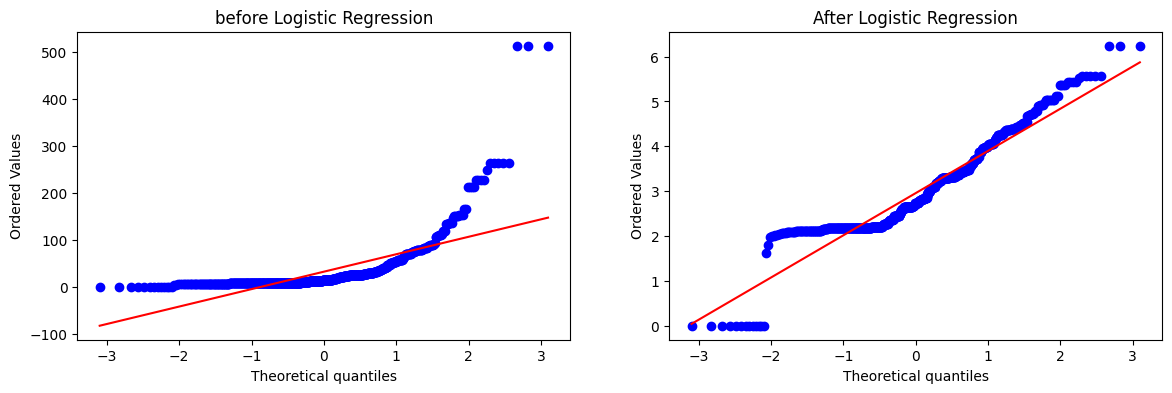

In [55]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('before Logistic Regression')


plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('After Logistic Regression')

plt.show()

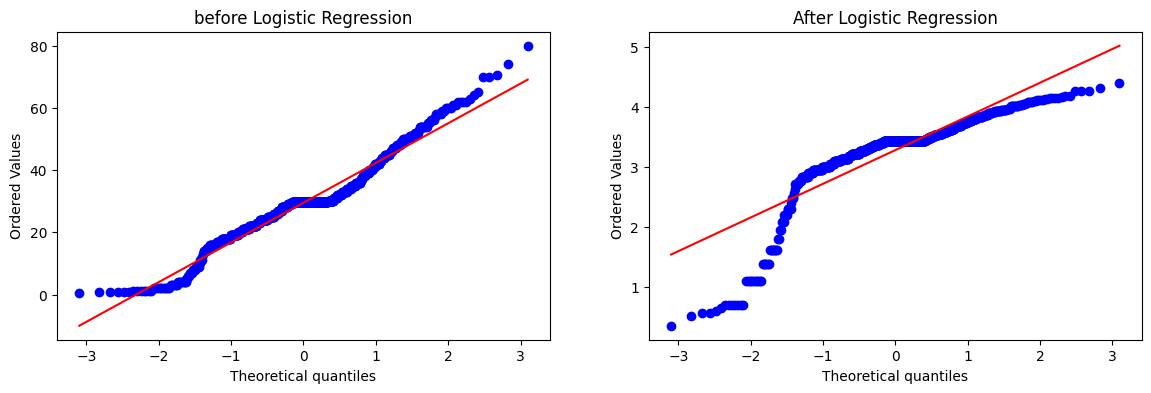

In [56]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('before Logistic Regression')


plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('After Logistic Regression')

plt.show()

#### This is time Only Function Transformer for 'Fare' Feature

In [57]:
from sklearn.compose import ColumnTransformer

fare_transformer = ColumnTransformer([('LG for Fare', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

In [58]:
X_train_fare_transformer = fare_transformer.fit_transform(X_train)
X_test_fare_transformer = fare_transformer.transform(X_test)

In [59]:
log_model_2 = LogisticRegression()
Dec_model_2 = DecisionTreeClassifier()

In [60]:
log_model_2.fit(X_train_fare_transformer, y_train)
Dec_model_2.fit(X_train_fare_transformer, y_train)

DecisionTreeClassifier()

In [61]:
log_per_2 = log_model_2.predict(X_test_fare_transformer)
Dec_per_2 = Dec_model_2.predict(X_test_fare_transformer)

print('Logistic Regression Accuracy:', accuracy_score(y_test, log_per_2))
print('Decision Tree Accuracy:', accuracy_score(y_test, Dec_per_2))

Logistic Regression Accuracy: 0.6703910614525139
Decision Tree Accuracy: 0.6536312849162011


In [69]:
def custom_fln_transformer(transform):
    X = df.iloc[:,1:]
    y = df.iloc[:,0]

    col_transfer = ColumnTransformer([('custom_trans', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')
    X_transformed = col_transfer.fit_transform(X)

    model = LogisticRegression()

    print('accuracy', np.mean(cross_val_score(model, X_transformed, y,scoring='accuracy',cv=10)))


    plt.figure(figsize=(14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Before Transformation')

    plt.subplot(122)
    stats.probplot(X_transformed[:,0], dist="norm", plot=plt)
    plt.title('After Transformation')

    plt.show()

accuracy 0.6712609238451936


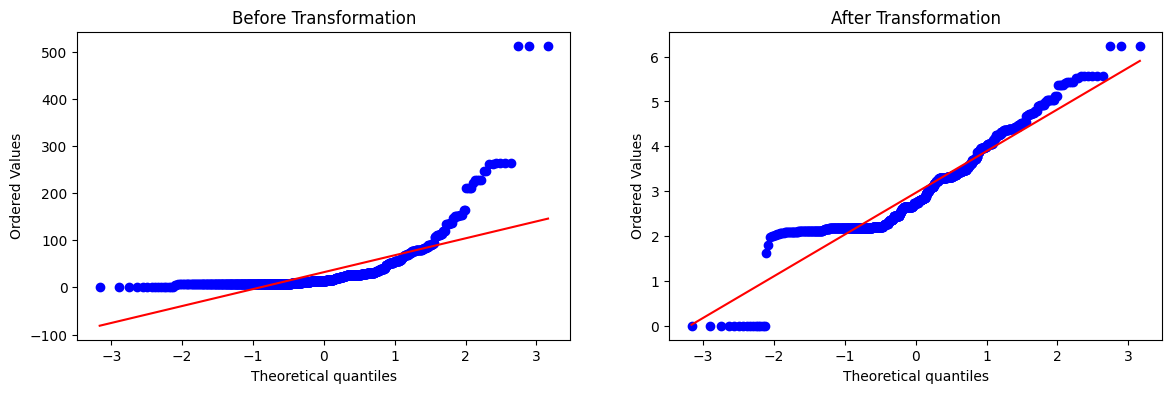

In [90]:
custom_fln_transformer(np.log1p)